# SPATIAL ANALYSIS OF ISS DATASETS

This tutorial is an example of how to use Squidpy to analyze In Situ Sequencing datasets, performing several different statistical tests to understand the spatial organization of tissues. This tutorial follows the scanpy tutorial/pciseq tutorials, so we'll take as an input an h5 object created. More information, if needed, can be found at: https://squidpy.readthedocs.io/en/stable/tutorials.html

# Loading the needed packages

The first step is to load the needed packages. If any of them fails, please go and check that they are installed in the appropiate environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import squidpy as sq
import scanpy as sc
import os

# Load your dataset

We are going to load our dataset, were we have alredy performed clustering, from an h5ad file. If you want to check how to format your data in this format, please check the Scanpy tutorial

In [2]:
adatall=sc.read('/media/sergio/FRIGG_discovair/ISS/adata_baysor/adata_16samples_clustered_pearsonresidual_annotated_exc_TLN.h5ad')

/home/sergio/anaconda3/envs/scanpy_updated/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
adata=adatall

In [4]:
adata.obsm["spatial"]=np.array([adata.obs.x,adata.obs.y,adata.obs.y]).transpose().astype('float64')

In [8]:
adata=sc.AnnData(adata.raw.X,obs=adata.obs,var=adata.raw.var)

In [124]:
dictio=dict(zip())
     
dictio={'LNG2':'1-PROX(LNG2)',
'LNG3':'2-MID(LNG3)',
'LNG1':'3-DIST(LNG156)',
'LNG5':'3-DIST(LNG156)',
'LNG6':'3-DIST(LNG156)'}


In [127]:
adata.obs['main_region']=adata.obs['region'].map(dictio)

In [128]:
celltype_distribution=pd.crosstab(adata.obs['annotation_2'],adata.obs['main_region'])

In [129]:
celltype_distribution.div(celltype_distribution.sum(axis=1),axis=0)

main_region,1-PROX(LNG2),2-MID(LNG3),3-DIST(LNG156)
annotation_2,,,
AT1,0.063118,0.082780,0.854101
AT2,0.001688,0.040854,0.957458
Acinar cells,0.301197,0.251976,0.446828
Adventitial fib.,0.345352,0.217760,0.436887
Alveolar fib.,0.086592,0.103531,0.809876
B naive_mature,0.361393,0.277939,0.360668
B plasma cells,0.744448,0.155774,0.099778
Basal cells,0.514489,0.194543,0.290968
Capillary end.,0.069326,0.103530,0.827145


In [161]:
adatasub=adata[adata.obs['annotation_2']=='Secretory goblet']
sc.tl.rank_genes_groups(adatasub, 'main_region', method='t-test', key_added = "t-test")
sc.pl.rank_genes_groups(adatasub, n_genes=5, sharey=False, key = "t-test",fontsize=20)
adatasub.obs['main_region']=adatasub.obs['main_region'].astype("str")
sc.pl.rank_genes_groups_dotplot(adatasub, n_genes=5, key="t-test", groupby="main_region",min_logfoldchange=1.5)

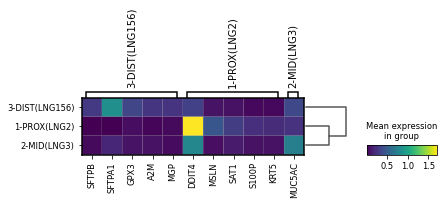

In [163]:
sc.pl.rank_genes_groups_matrixplot(adatasub, n_genes=5, key="t-test", groupby="main_region",min_logfoldchange=1.5)

In [170]:
glist=[]
region=[]
for e in adatasub.obs['main_region'].unique():
    print(e)
    try:
        lis=sc.get.rank_genes_groups_df(adatasub, group=e,key='t-test', log2fc_min=2,pval_cutoff=0.001)['names'].squeeze().str.strip().tolist()
        glist=glist+lis
    except:
        print('Not possible')

1-PROX(LNG2)
2-MID(LNG3)
3-DIST(LNG156)


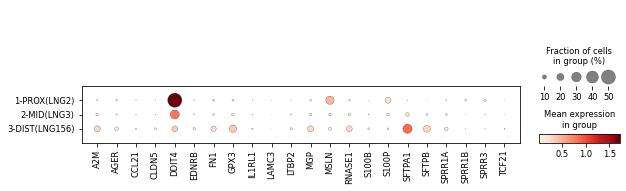

In [171]:
sc.pl.dotplot(adatasub,np.unique(glist),groupby='main_region')

# Other cell types

In [189]:
list(adata.obs['annotation_2'].unique())

['Secretory goblet',
 'Ciliated cells',
 'Mast cells',
 'SMG',
 'Basal cells',
 'Capillary end. (g)',
 'Monocytes',
 'Adventitial fib.',
 'Club cells',
 'SMC',
 nan,
 'not_assigned',
 'Capillary end.',
 'Deuterosomal',
 'AT1',
 'NE cells',
 'Vascular end.',
 'Macrophages',
 'Acinar cells',
 'Alveolar fib.',
 'B naive_mature',
 'Lymphatic end.',
 'NK cells',
 'B plasma cells',
 'Myoepithelial',
 'AT2',
 'T cells',
 'Pericytes']

In [195]:
adatasub=adata[adata.obs['annotation_2']=='Ciliated cells']

/home/sergio/anaconda3/envs/scanpy_updated/lib/python3.7/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/sergio/anaconda3/envs/scanpy_updated/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


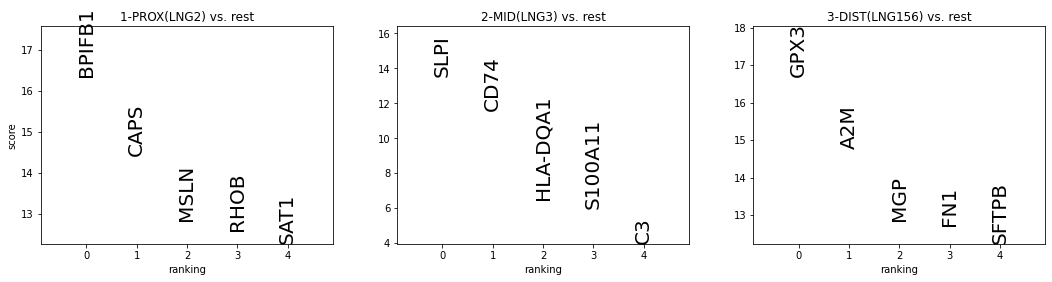

         Falling back to preprocessing with `sc.pp.pca` and default params.


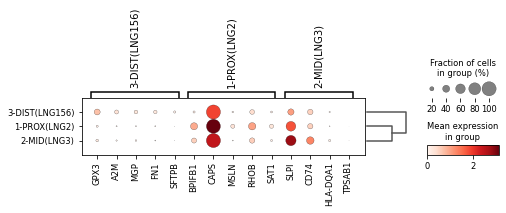

In [196]:

sc.tl.rank_genes_groups(adatasub, 'main_region', method='t-test', key_added = "t-test")
sc.pl.rank_genes_groups(adatasub, n_genes=5, sharey=False, key = "t-test",fontsize=20)
adatasub.obs['main_region']=adatasub.obs['main_region'].astype("str")
sc.pl.rank_genes_groups_dotplot(adatasub, n_genes=5, key="t-test", groupby="main_region",min_logfoldchange=1.5)

In [200]:
glist=[]
region=[]
for e in adatasub.obs['main_region'].unique():
    print(e)
    try:
        lis=sc.get.rank_genes_groups_df(adatasub, group=e,key='t-test', log2fc_min=2.0,pval_cutoff=0.001)['names'].squeeze().str.strip().tolist()
        glist=glist+lis
    except:
        print('Not possible')

1-PROX(LNG2)
2-MID(LNG3)
Not possible
3-DIST(LNG156)


In [201]:
glist

['BPIFB1',
 'MSLN',
 'HES6',
 'PRR4',
 'GPX3',
 'A2M',
 'MGP',
 'FN1',
 'SFTPB',
 'SFTPA1',
 'RNASE1',
 'CLDN5',
 'IL1RL1',
 'SCEL']

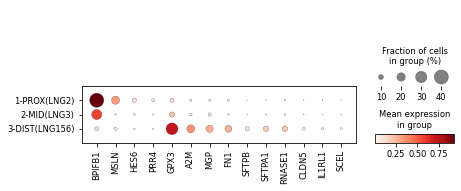

In [202]:
sc.pl.dotplot(adatasub,glist,groupby='main_region')